# Prova 2 - C210

### Instruções
* Esta prova deve ser feita INDIVIDUALMENTE, sem acesso a outros alunos
* É permitido o acesso aos códigos disponibilizados no Github da disciplina: https://github.com/Willyprp/C210_LAB
* Para a realização da prova apenas altere este notebook
* Ao final, envie na tarefa criada no Teams apenas o notebook com as alterações. **Renomeie o arquivo com seu nome (exemplo WillyPaim.ipynb) antes de enviar**.
* **As saídas das células serão utilizadas para a correção, portanto não limpe as saídas, se não será impossível corrigir sua prova**
* Preencha o campo a seguir com suas informações

#### Boa prova!!!

##### Nome:
##### Curso: 
##### Matrícula:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## REDES NEURAIS
Abaixo estão os códigos das redes neurais estudadas. **Não é necessário alterá-los.** Apenas execute-os para conseguir solucionar as questões.

### Perceptron

In [2]:
#CRIANDO A CLASSE DA REDE PERCEPTRON
class Perceptron:
    
    def __init__(self, lr, n_epochs):
        self.lr = lr
        self.n_epochs = n_epochs
        
    def activation(self, value):
        return (1 if value > 0 else -1 if value < 0 else 0)
        
    def predict(self, x):
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        return (target - predicted)
    
    def train(self, x, d):
        self.weights = np.random.random(x.shape[1])
        self.bias = np.random.random()
        self.w_bias = np.random.random()
        
        epoch = 0
        is_error = True
        self.total_error = []
        
        while is_error and epoch < self.n_epochs:
            
            is_error  = False
            epoch_errors = 0
            
            # Para cada amostra
            for xi, target in zip(x, d):
                
                predicted = self.predict(xi)
                predicted = self.activation(predicted)
                
                current_error = self.evaluate(target, predicted)
                epoch_errors += current_error
                
                # Se houve erro, atualizar os pesos
                if predicted != target:
                    self.weights += self.lr * current_error * xi
                    self.w_bias += self.lr * current_error * self.bias
                    is_error = True
            
            print(f"EPOCH: {epoch} - Erros da época: {epoch_errors}")
            self.total_error.append(epoch_errors/len(x))
            epoch += 1
            
    def test(self, x):
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

### Adaline

In [3]:
#CRIANDO A CLASSE DA REDE ADALINE
class Adaline:
    
    def __init__(self, lr, e):
        self.lr = lr
        self.e = e
        
    def activation(self, value):
        return (1 if value >= 0 else -1)
        
    def predict(self, x):
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        return (target - predicted)
    
    def train(self, x, d):
        self.weights = np.random.random(x.shape[1])
        self.bias = -1
        self.w_bias = np.random.random()
        
        epoch = 0
        self.total_mse = []
        last_mse = np.inf
        
        
        while True:
            mse = 0
            # Para cada amostra
            for xi, target in zip(x, d):
                
                predicted = self.predict(xi)  
                current_error = self.evaluate(target, predicted)
                mse += (current_error ** 2)
                self.weights += self.lr * current_error * xi
                self.w_bias += self.lr * current_error * self.bias
                
            mse = (mse/len(x))
            print(f"EPOCH: {epoch}\t- MSE: {mse}\t- MSE_ant - MSE: {abs(last_mse - mse)}")
            if abs(last_mse - mse) <= self.e:
                break
            
            self.total_mse.append(mse)
            last_mse = mse
            epoch +=1
            
    def test(self, x):
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

### Multilayer Perceptron - MLP (Perceptron de múltiplas camadas)

In [4]:
class MLP():
    
    def __init__(self, lr, e, neurons):
        self.lr = lr
        self.e = e
        self.neurons = neurons
        
        
    def sigmoid(self, valor):
        return (1/(1+math.e**(-valor)))

    def sigmoid_deriv(self, valor):
        sig = self.sigmoid(valor)
        return sig*(1 - sig)

    def activate(self, valor):
        return self.sigmoid(valor)
    
    def deriv(self, valor):
        return self.sigmoid_deriv(valor)

    def evaluate(self, target, predicted):
        return (target - predicted)

    def predict(self, input_data, weights):
        return np.dot(input_data, weights).reshape(1, -1)
    
    def train(self, x, d):
        self.w1 = np.random.random((x.shape[1]+1,self.neurons[0]))
        self.w2 = np.random.random((self.neurons[0], self.neurons[1]))
        self.w3 = np.random.random((self.neurons[1], self.neurons[2]))
        
        epoch = 0
        last_mse = np.inf
        self.total_mse = []
        self.bias = -1
        
        while True:
            mse = 0
            for xi, target in zip(x,d):
                input_value = np.insert(xi, 0, self.bias)
                i1 = self.predict(input_value, self.w1)
                y1 = self.activate(i1)
                i2 = self.predict(y1, self.w2)
                y2 = self.activate(i2)
                i3 = self.predict(y2, self.w3)
                y3 = self.activate(i3)
                current_error = self.evaluate(target, y3)
                mse+=(current_error ** 2)

                delta3 = (target - y3) * self.deriv(i3)
                self.w3 += self.lr * np.dot(y2.T, delta3)

                delta2 = np.dot(delta3, self.w3.T) * self.deriv(i2)
                self.w2 += self.lr * np.dot(y1.T, delta2)

                delta1 = np.dot(delta2, self.w2.T) * self.deriv(i1)
                self.w1 += self.lr * np.dot(input_value.reshape(1, -1).T, delta1)

            mse = mse / len(x)
            
            print(f"EPOCH: {epoch} - MSE: {mse} - |mse_ant - mse|: {abs(last_mse - mse)}")
            if abs(last_mse - mse) <= self.e:
                break
            
            self.total_mse.append(mse)
            last_mse = mse
            epoch += 1
        
        
        
    def test(self, x):
        results = []
        for xi in x:
            input_value = np.insert(xi, 0, self.bias)
            i1 = self.predict(input_value, self.w1)
            y1 = self.activate(i1)
            i2 = self.predict(y1, self.w2)
            y2 = self.activate(i2)
            i3 = self.predict(y2, self.w3)
            y3 = self.activate(i3)
            
            results.append(int(np.rint(y3)))
            
        return results
            
    

## QUESTÕES

### 1)   São fornecidos os valores de *x* e *d* de entrada. Analise a dispersão dos pontos (gráfico).

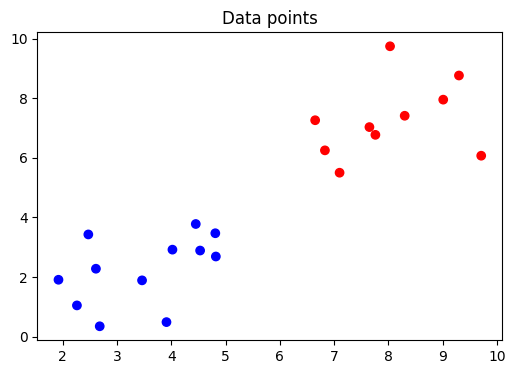

In [5]:
x = np.array([[8.3 , 7.41], [7.1 , 5.5], [9.3 , 8.76], [2.26, 1.05], [4.02, 2.92], [1.92, 1.91], [2.68, 0.35], 
              [4.82, 2.69], [9.71, 6.07], [3.46, 1.89], [4.53, 2.89], [2.61, 2.28], [7.65, 7.03], [2.47, 3.43], 
              [7.76, 6.77], [4.81, 3.47], [6.83, 6.25], [3.91, 0.49], [6.65, 7.26], [9.01, 7.95], [4.45, 3.78], 
              [8.03, 9.74]])

d = np.array([1, 1, 1, -1,  -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1])

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

**a) (10 pontos)** Crie duas redes neurais (1 Perceptron e 1 Adaline), defina os parâmetros delas como preferir, seguindo o quadro de restrições abaixo.

|Hiperparâmetro|Restrição|
|-|-|
|Taxa de aprendizado|Entre 0.005 e 0.1|
|Tolerância|Entre $10^{-7}$ e $10^{-6}$|
|Máximo de épocas|Entre 1000 e 10000|

Exemplo de criação de rede
```python
rede1 = MODELO_DA_REDE(parâmetros da rede)
rede2 = MODELO_DA_REDE(parâmetros da rede)
```

In [6]:
# REDE NEURAL 1
rede1 = Perceptron(lr = 0.1, n_epochs = 2000)

# REDE NEURAL 2
rede2 = Adaline(lr = 0.01, e = 1e-6)


**b) (12 pontos)** Treine as duas redes com os dados fornecidos anteriormente (x e d). 

In [7]:
# TREINAMENTO REDE 1
rede1.train(x = x, d = d)

EPOCH: 0 - Erros da época: -10
EPOCH: 1 - Erros da época: -14
EPOCH: 2 - Erros da época: -8
EPOCH: 3 - Erros da época: -10
EPOCH: 4 - Erros da época: -6
EPOCH: 5 - Erros da época: -4
EPOCH: 6 - Erros da época: -6
EPOCH: 7 - Erros da época: -4
EPOCH: 8 - Erros da época: -4
EPOCH: 9 - Erros da época: -4
EPOCH: 10 - Erros da época: -4
EPOCH: 11 - Erros da época: -4
EPOCH: 12 - Erros da época: -2
EPOCH: 13 - Erros da época: -2
EPOCH: 14 - Erros da época: -4
EPOCH: 15 - Erros da época: -2
EPOCH: 16 - Erros da época: -2
EPOCH: 17 - Erros da época: -2
EPOCH: 18 - Erros da época: -4
EPOCH: 19 - Erros da época: -4
EPOCH: 20 - Erros da época: -2
EPOCH: 21 - Erros da época: -4
EPOCH: 22 - Erros da época: -4
EPOCH: 23 - Erros da época: -2
EPOCH: 24 - Erros da época: -2
EPOCH: 25 - Erros da época: 0


In [8]:
# TREINAMENTO REDE 2
rede2.train(x = x, d = d)

EPOCH: 0	- MSE: 4.547956696535176	- MSE_ant - MSE: inf
EPOCH: 1	- MSE: 0.8054993248157821	- MSE_ant - MSE: 3.7424573717193943
EPOCH: 2	- MSE: 0.7554195760947244	- MSE_ant - MSE: 0.05007974872105769
EPOCH: 3	- MSE: 0.713803003743119	- MSE_ant - MSE: 0.04161657235160543
EPOCH: 4	- MSE: 0.6780813945101172	- MSE_ant - MSE: 0.03572160923300183
EPOCH: 5	- MSE: 0.6466132220044568	- MSE_ant - MSE: 0.03146817250566036
EPOCH: 6	- MSE: 0.6183443159721483	- MSE_ant - MSE: 0.028268906032308472
EPOCH: 7	- MSE: 0.5925914159594887	- MSE_ant - MSE: 0.02575290001265962
EPOCH: 8	- MSE: 0.5689045863754013	- MSE_ant - MSE: 0.02368682958408741
EPOCH: 9	- MSE: 0.5469801221438719	- MSE_ant - MSE: 0.021924464231529384
EPOCH: 10	- MSE: 0.5266056888614795	- MSE_ant - MSE: 0.020374433282392412
EPOCH: 11	- MSE: 0.5076259713733039	- MSE_ant - MSE: 0.018979717488175618
EPOCH: 12	- MSE: 0.4899213155397971	- MSE_ant - MSE: 0.017704655833506777
EPOCH: 13	- MSE: 0.47339455956058835	- MSE_ant - MSE: 0.016526755979208774


São fornecidos os seguintes dados de teste:

In [9]:
x_teste = np.array([[3.29, 1.67], [5.28, 5.98], [3.49, 4.9 ], [1.82, 3.51], [7.68, 9.95], [8.05, 6.01], [6.8 , 6.09], 
                    [9.45, 9.78]])

d_teste = np.array([-1, -1, -1, -1, 1, 1, 1, 1])

**c) (12 pontos)** Teste as duas redes enviando x_teste. Apresente o resultado do teste e verifique se o resultado de ambas é igual aos valores de d_teste [-1, -1, -1, -1, 1, 1, 1, 1]

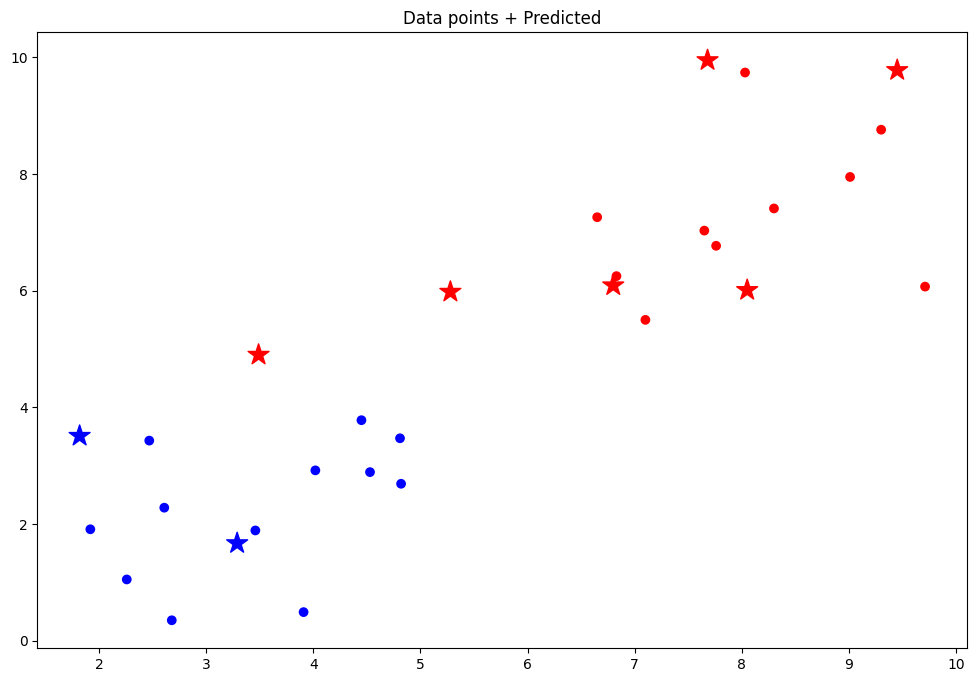

In [10]:
# TESTES DA REDE 1
# lembre-se de mostrar o resultado dos testes

teste_resultado_percep = rede1.test(x_teste)
teste_resultado_percep

# Mostrando
plt.figure(figsize=(12,8))
plt.title("Data points + Predicted")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c = teste_resultado_percep, cmap = 'bwr', marker = "*", s=250)
plt.show()

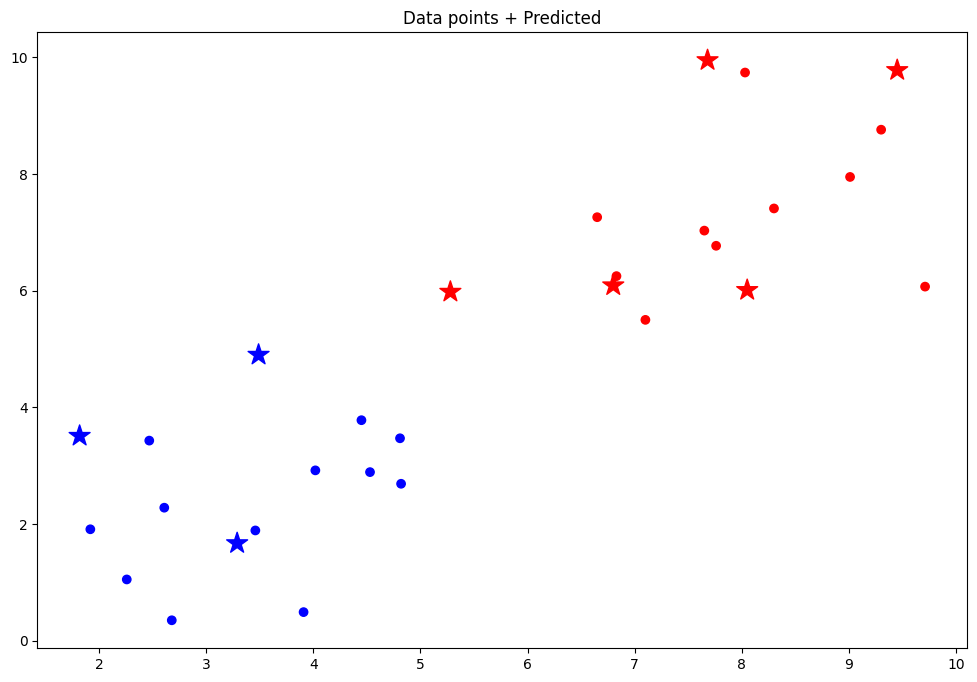

In [11]:
# TESTES DA REDE 2
# lembre-se de mostrar o resultado dos testes
teste_resultado_adaline = rede2.test(x_teste)
teste_resultado_adaline 

# Mostrando
plt.figure(figsize=(12,8))
plt.title("Data points + Predicted")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c = teste_resultado_adaline, cmap = 'bwr', marker = "*", s=250)
plt.show()

**d) (20 pontos)** Qual das redes treinou mais rápido? Qual obteve mais resultados iguais aos esperados?

Resposta: A rede Perceptron treinou mais rápido, porém a Adaline obteve resultados mais próximos do esperado.

### 2) São fornecidos os valores de *x* e *d* de entrada. Analise a dispersão dos pontos (gráfico).

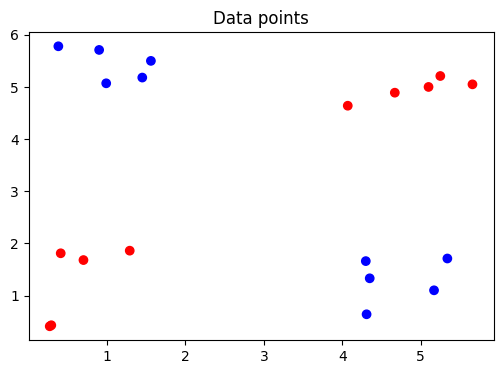

In [12]:
x = np.array([[0.27, 0.41],[0.41, 1.81],[1.29, 1.86],[0.29, 0.43],[0.7 , 1.68],
              [5.66, 5.05],[5.25, 5.21],[4.07, 4.64],[4.67, 4.89],[5.1 , 5.  ],
              [1.45, 5.18],[0.99, 5.07],[0.38, 5.78],[0.9 , 5.71],[1.56, 5.5 ],
              [5.17, 1.1 ],[4.3 , 1.66],[5.34, 1.71],[4.31, 0.64],[4.35, 1.33]])

d = np.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

 **a) (10 pontos)** Treine uma rede MLP com:
 * taxa de aprendizado: 0.5
 * tolerância: 1e-7
 * neurônios por camada: camada escondida 1 = 4, camada escondida 2 = 4, camada de saída = 1

In [13]:
# CRIAR REDE 3
rede3 = MLP(lr = 0.5, e = 1e-7, neurons = [4, 4, 1])
# TREINAR A REDE
rede3.train(x = x, d = d)

EPOCH: 0 - MSE: [[0.27085093]] - |mse_ant - mse|: [[inf]]
EPOCH: 1 - MSE: [[0.23408157]] - |mse_ant - mse|: [[0.03676936]]
EPOCH: 2 - MSE: [[0.25017816]] - |mse_ant - mse|: [[0.01609659]]
EPOCH: 3 - MSE: [[0.25582259]] - |mse_ant - mse|: [[0.00564444]]
EPOCH: 4 - MSE: [[0.25716864]] - |mse_ant - mse|: [[0.00134605]]
EPOCH: 5 - MSE: [[0.25744334]] - |mse_ant - mse|: [[0.0002747]]
EPOCH: 6 - MSE: [[0.25746938]] - |mse_ant - mse|: [[2.60347165e-05]]
EPOCH: 7 - MSE: [[0.25743989]] - |mse_ant - mse|: [[2.94826742e-05]]
EPOCH: 8 - MSE: [[0.25739917]] - |mse_ant - mse|: [[4.07209373e-05]]
EPOCH: 9 - MSE: [[0.25735717]] - |mse_ant - mse|: [[4.20006081e-05]]
EPOCH: 10 - MSE: [[0.25731603]] - |mse_ant - mse|: [[4.11383178e-05]]
EPOCH: 11 - MSE: [[0.25727614]] - |mse_ant - mse|: [[3.98945513e-05]]
EPOCH: 12 - MSE: [[0.25723748]] - |mse_ant - mse|: [[3.86580614e-05]]
EPOCH: 13 - MSE: [[0.25719997]] - |mse_ant - mse|: [[3.75094489e-05]]
EPOCH: 14 - MSE: [[0.25716351]] - |mse_ant - mse|: [[3.6460790

**b) (16 pontos)** Crie uma nova rede MLP com *taxa de aprendizado* e *tolerância* iguais aos da rede anterior.  
A quantidade de neurônios por camada deve seguir a seguinte regra:  
* Camada escondida 1 -> Maior dígito da sua matrícula (caso o maior dígito seja 1 utilize 2 neurônios)
* Camada escondida 2 -> Menor dígito da sua matrícula (caso o menor dígito seja 0 ou 1 utilize 2 neurônios)
* Camada de saída -> 1 neurônio  
 **Exemplo** : Matrícula **1599**  
Camada escondida 1 -> 9 neurônios  
Camada escondida 2 -> 2 neurônios (menor dígito é 1)  
Camada de saída -> 1 neurônio  

Treine a rede criada

In [14]:
# Criar a rede
rede3 = MLP(lr = 0.5, e = 1e-7, neurons = [3, 2, 1])

# Treinar a rede
rede3.train(x = x, d = d)

EPOCH: 0 - MSE: [[0.26410348]] - |mse_ant - mse|: [[inf]]
EPOCH: 1 - MSE: [[0.24764832]] - |mse_ant - mse|: [[0.01645516]]
EPOCH: 2 - MSE: [[0.2496583]] - |mse_ant - mse|: [[0.00200998]]
EPOCH: 3 - MSE: [[0.25300788]] - |mse_ant - mse|: [[0.00334959]]
EPOCH: 4 - MSE: [[0.25500026]] - |mse_ant - mse|: [[0.00199238]]
EPOCH: 5 - MSE: [[0.25599606]] - |mse_ant - mse|: [[0.0009958]]
EPOCH: 6 - MSE: [[0.25646785]] - |mse_ant - mse|: [[0.00047179]]
EPOCH: 7 - MSE: [[0.25668824]] - |mse_ant - mse|: [[0.00022039]]
EPOCH: 8 - MSE: [[0.25679207]] - |mse_ant - mse|: [[0.00010383]]
EPOCH: 9 - MSE: [[0.2568426]] - |mse_ant - mse|: [[5.05263668e-05]]
EPOCH: 10 - MSE: [[0.25686883]] - |mse_ant - mse|: [[2.62381045e-05]]
EPOCH: 11 - MSE: [[0.25688395]] - |mse_ant - mse|: [[1.51156277e-05]]
EPOCH: 12 - MSE: [[0.25689388]] - |mse_ant - mse|: [[9.93053986e-06]]
EPOCH: 13 - MSE: [[0.25690129]] - |mse_ant - mse|: [[7.41128189e-06]]
EPOCH: 14 - MSE: [[0.25690738]] - |mse_ant - mse|: [[6.0839767e-06]]
EPOCH: 

**c) (20 pontos)** Qual das duas redes MLP foi melhor no treinamento? Justifique citando a quantidade de épocas de treinamento e o erro final (mse)

Resposta: A primeira rede foi melhor porque teve menos Épocas para chegar no resultado e o MSE ao final da execução foi menor.